In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import requests
import json
from pprint import pprint

In [2]:
data = pd.read_csv('2017.csv', encoding='cp1252')
data1 = pd.read_csv('2018.csv', encoding='cp1252')
data2 = pd.read_csv('2019.csv', encoding='cp1252')
data3 = pd.read_csv('2020.csv', encoding='cp1252')

frames = [data,data1,data2,data3]

df = pd.concat(frames)
df.columns

C:\Users\Smooth\AppData\Local\Temp\ipykernel_30740\2436803834.py:1: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2017.csv', encoding='cp1252')
C:\Users\Smooth\AppData\Local\Temp\ipykernel_30740\2436803834.py:3: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('2019.csv', encoding='cp1252')


Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [3]:
df_weather_year = df.groupby('YEAR')['VE_TOTAL'].sum()
df_weather_year
# In 2020 the pandemic started and it is the year with the most number of accidents. Stay at home rules were in effect.

YEAR
2017    54511
2018    53614
2019    52988
2020    56103
Name: VE_TOTAL, dtype: int64

<AxesSubplot:ylabel='VE_TOTAL'>

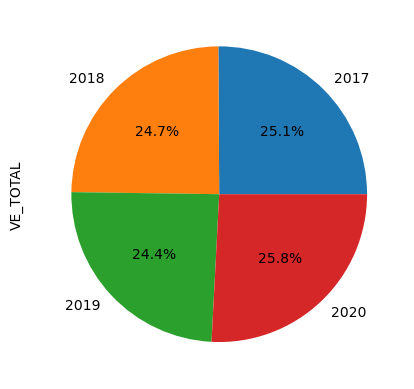

In [4]:
df_weather_year.plot(kind='pie',y='VE_TOTAL',autopct='%1.1f%%')

In [5]:
df_only_2020 = df.loc[df['YEAR'] == 2020,:]
df_2020_month = df.groupby(['MONTHNAME'])['VE_TOTAL'].sum()

max_month = df_2020_month.idxmax()
max_accidents = df_2020_month[max_month]

print(f'{max_month} is the month with thehighest accidents for 2020, with a total of: {max_accidents}')

October is the month with thehighest accidents for 2020, with a total of: 20242


<AxesSubplot:xlabel='MONTHNAME'>

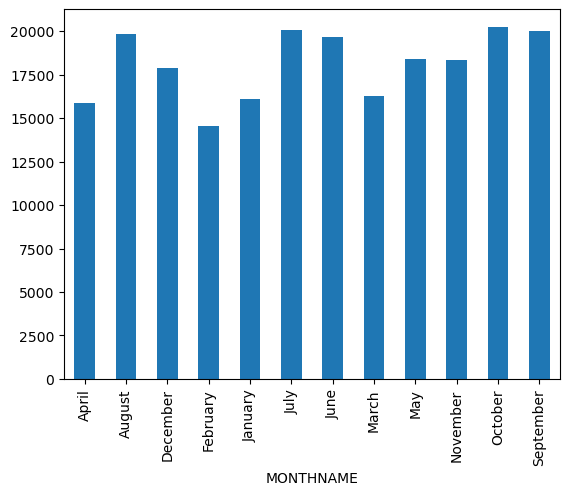

In [6]:
df_2020_month.plot(kind='bar')


In [7]:
df_weather_summary = df.groupby(['WEATHERNAME'])['VE_TOTAL'].sum()
df_weather_summary.sort_values(ascending=False)

WEATHERNAME
Clear                       148720
Cloudy                       30513
Rain                         16349
Not Reported                 14758
Fog, Smog, Smoke              2459
Snow                          2363
Reported as Unknown            570
Sleet or Hail                  341
Severe Crosswinds              334
Blowing Snow                   238
Freezing Rain or Drizzle       181
Other                          177
Unknown                        123
Blowing Sand, Soil, Dirt        90
Name: VE_TOTAL, dtype: int64

<AxesSubplot:ylabel='VE_TOTAL'>

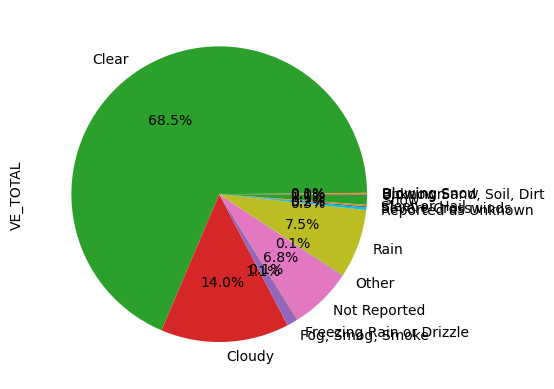

In [8]:
df_weather_summary.plot(kind='pie',y='VE_TOTAL',autopct='%1.1f%%')

In [9]:
#Scrapping Data
states_list = pd.read_html('https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm')
states_list_1 = states_list[0]
state_abbr = states_list_1[[0,2]]
state_abbr_1 = states_list_1[[3,5]]


ind_remove = [0,28]
state_1 = state_abbr.drop(ind_remove).rename(columns={
    0 : 'STATENAME',
    2 : 'STATE'
})

ind_remove_1 = [0,27,28]
state_2 = state_abbr_1.drop(ind_remove_1).rename(columns={
    3 : 'STATENAME',
    5 : 'STATE'
})

frames1 = [state_1,state_2]
states_list = pd.concat(frames1)
states_list

,STATENAME,STATE
1,Alabama,01
2,Alaska,02
3,Arizona,04
4,Arkansas,05
5,California,06
6,Colorado,08
7,Connecticut,09
8,Delaware,10
9,District of Columbia,11
10,Florida,12


In [10]:
#API
year_list = [2017,2018,2019]
population_171819 = []

for years in year_list:
    base_url = f'https://api.census.gov/data/{years}/pep/population'
    params = {
    'get' : 'POP',
    'for' : 'STATE:*',
    'key' : '60a95aa0242affd79076a8b964cd2c4516142c32'
    }
    data = requests.get(base_url,params=params).json()
    data = pd.DataFrame(data)
    data['YEAR'] = f'{years}'
    population_171819.append(data)

In [11]:
pop_17 = population_171819[0]
pop_18 = population_171819[1]
pop_19 = population_171819[2]

ind_remove_10 = [0]
pop_17_list = pop_17.drop(ind_remove_10).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

ind_remove_11 = [0]
pop_18_list = pop_18.drop(ind_remove_11).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

ind_remove_12 = [0]
pop_19_list = pop_19.drop(ind_remove_12).rename(columns={
    0 : 'POPULATION',
    1 : 'STATE'
})

frames2 = [pop_17_list,pop_18_list,pop_19_list]
pop_171819 = pd.concat(frames2)
pop_171819

,POPULATION,STATE,YEAR
1,693972,11,2017
2,20984400,12,2017
3,10429379,13,2017
4,1427538,15,2017
5,1716943,16,2017
...,...,...,...
48,7614893,53,2019
49,1792147,54,2019
50,5822434,55,2019
51,578759,56,2019


In [12]:
pop_171819[["POPULATION"]] = pop_171819[["POPULATION"]].astype(int)
pop_171819.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 52
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   POPULATION  156 non-null    int32 
 1   STATE       156 non-null    object
 2   YEAR        156 non-null    object
dtypes: int32(1), object(2)
memory usage: 4.3+ KB


In [52]:
by_state = pop_171819.groupby(['STATE'])['POPULATION'].mean()

by_state = pd.DataFrame(by_state)
by_state["YEAR"] = 2020
by_state["STATE"] = by_state.index
by_state


# by_state["POPULATION"] = by_state["POPULATION"].astype(int)
# by_state
# frame3 = [pop_171819,by_state]
# final_pop =  pd.concat(frame3)



,POPULATION,YEAR,STATE
STATE,,,
01,4888601,2020,01
02,736259,2020,02
04,7155544,2020,04
05,3011969,2020,05
06,39535307,2020,06
08,5687151,2020,08
09,3575378,2020,09
10,967624,2020,10
11,700725,2020,11


In [38]:
df_with_population = pd.merge(df, state_list_pop, on="STATENAME")
df_with_population

NameError: name 'state_list_pop' is not defined

In [39]:
df_weather_state = df_with_population.groupby(['STATENAME'])['VE_TOTAL'].sum()
df_weather_state
df_weather_state.sort_values(ascending=False)

NameError: name 'df_with_population' is not defined

In [48]:
final_pop["STATE"] =final_pop["STATE"].astype(int)
final_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 1 to 72
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   POPULATION  208 non-null    int32 
 1   STATE       208 non-null    int32 
 2   YEAR        208 non-null    object
dtypes: int32(2), object(1)
memory usage: 4.9+ KB


In [ ]:
pop_20_list = pop_17_list["STATE"]


# for i in by_state:
#     pop_20_list["POPULATION"] = i
pop_17_list

In [51]:
df1 = pd.merge(final_pop,df, on = "STATE", how = "outer")
df


,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0
1,1,Alabama,10002,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0
2,1,Alabama,10003,3,3,0,0,3,3,0,...,88,Not Applicable (Not Transported),0.0,NaN,0.0,NaN,0.0,NaN,1,0
3,1,Alabama,10004,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),20.0,Police Pursuit Involved,0.0,NaN,0.0,NaN,1,0
4,1,Alabama,10005,1,1,0,0,2,2,0,...,11,11,0.0,NaN,0.0,NaN,0.0,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35930,56,Wyoming,560111,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
35931,56,Wyoming,560112,3,3,0,0,8,8,0,...,50,50,NaN,NaN,NaN,NaN,NaN,NaN,2,0
35932,56,Wyoming,560113,3,3,0,0,9,9,0,...,99,Unknown EMS Hospital Arrival Time,NaN,NaN,NaN,NaN,NaN,NaN,1,0
35933,56,Wyoming,560114,2,2,0,1,3,3,1,...,88,Not Applicable (Not Transported),NaN,NaN,NaN,NaN,NaN,NaN,1,0
